In [1]:
import sympy as sp

In [2]:
from custom_libraries.stepper import *

In [3]:
x, k, A1, A2, B1, B2, C1, C2, V, E, L = sp.symbols( "x k A1 A2 B1 B2 C1 C2 V E L" )

In [4]:
exponential = lambda position, k, first_coefficent, second_coefficent : ( first_coefficent * sp.exp( k * position ) ) + ( second_coefficent * sp.exp( -k * position ) )

In [5]:
ex0 = exponential( x, k, B1, B2 )

In [6]:
ex0

B1*exp(k*x) + B2*exp(-k*x)

In [7]:
A = sp.Symbol( 'A' )

In [8]:
ex1 = exponential( 0, k, A1, A2 ).subs( { A1 + A2 : A } )

In [9]:
ex2 = exponential( L, k, C1, C2 )


In [10]:
ex1

A

In [11]:
b1s = sp.Eq( B1, sp.solve( [ sp.Eq( ex1, ex2 ), sp.Eq( ex1, ex0 ) ], [ B1, B2 ] )[ B1 ] )

In [12]:
b1s

Eq(B1, A*exp(-k*x) - B2*exp(-2*k*x))

In [13]:
B = sp.Symbol( 'B' )
b_sub = sp.Eq( ex0, ex0.subs( { B1 : B, B2 : 1 } ) )

In [14]:
beq = sp.Eq( B, sp.solve( b_sub, B )[ 0 ] )

In [15]:
C = sp.Symbol( 'C' )

In [16]:
ceq = sp.Eq( C, sp.solve( sp.Eq( ex2, ex2.subs( { C1 : C, C2 : 1 } ) ), C )[ 0 ] )

In [17]:
ceq

Eq(C, (C1*exp(2*L*k) + C2 - 1)*exp(-2*L*k))

In [18]:
times_2 = sp.Eq( 2 * ex0, ceq.rhs + ex1 )

In [19]:
times_2

Eq(2*B1*exp(k*x) + 2*B2*exp(-k*x), A + (C1*exp(2*L*k) + C2 - 1)*exp(-2*L*k))

In [20]:
norm = sp.integrate( times_2.lhs / 2 ** 2, ( x, 0, L ) )

In [21]:
norm

Piecewise((-(2*B1*k - 2*B2*k)/(4*k**2) + (2*B1*k*exp(L*k) - 2*B2*k*exp(-L*k))/(4*k**2), (k > -oo) & (k < oo) & Ne(k, 0)), (L*(B1/2 + B2/2), True))

In [22]:
sp.solve( [ sp.Eq( norm, 1 ), times_2 ], [ B1, B2 ] )

[]

In [23]:
sp.Eq( ex1, ex2 )

Eq(A, C1*exp(L*k) + C2*exp(-L*k))

In [24]:
zero = sp.Eq( L * ( ( B1 / 2 ) + B2 / 2 ), A )

In [25]:
P = sp.Symbol( 'P' )

norm = sp.Eq( norm.args[ 0 ].args[ 0 ], P )

In [26]:
norm

Eq(-(2*B1*k - 2*B2*k)/(4*k**2) + (2*B1*k*exp(L*k) - 2*B2*k*exp(-L*k))/(4*k**2), P)

In [27]:
times_2

Eq(2*B1*exp(k*x) + 2*B2*exp(-k*x), A + (C1*exp(2*L*k) + C2 - 1)*exp(-2*L*k))

In [28]:
eq02 = sp.Eq( ex0.subs( { x : L } ), ex2 )

In [29]:
eq02

Eq(B1*exp(L*k) + B2*exp(-L*k), C1*exp(L*k) + C2*exp(-L*k))

In [30]:
eq01 = sp.Eq( ex0.subs( { x : 0 } ), ex1 )

In [31]:
b2s = sp.Eq( B2, sp.solve( eq01, B2 )[ 0 ] )

In [32]:
b2s

Eq(B2, A - B1)

In [33]:
eq02 = eq02.subs( { B2 : b2s.rhs } )

In [34]:
eq02

Eq(B1*exp(L*k) + (A - B1)*exp(-L*k), C1*exp(L*k) + C2*exp(-L*k))

In [35]:
norm = norm.subs( { B2 : b2s.rhs } )

In [36]:
norm

Eq(-(2*B1*k - 2*k*(A - B1))/(4*k**2) + (2*B1*k*exp(L*k) - 2*k*(A - B1)*exp(-L*k))/(4*k**2), P)

In [37]:
times_2 = times_2.subs( { B2 : b2s.rhs } )

In [38]:
times_2

Eq(2*B1*exp(k*x) + 2*(A - B1)*exp(-k*x), A + (C1*exp(2*L*k) + C2 - 1)*exp(-2*L*k))

In [39]:
bsols = sp.solve( [ eq02.subs( { B2 : b2s.rhs } ), norm.subs( { B2 : b2s.rhs } ), times_2.subs( { B2 : b2s.rhs } ) ], B1 )

In [40]:
eq02 = sp.Eq( eq02.expand().lhs.collect( B1 ), eq02.rhs )

In [41]:
eq02

Eq(A*exp(-L*k) + B1*(exp(L*k) - exp(-L*k)), C1*exp(L*k) + C2*exp(-L*k))

In [42]:
eq02 = sp.Eq( eq02.lhs.args[ 1 ], eq02.rhs - eq02.lhs.args[ 0 ] )

In [43]:
eq02

Eq(B1*(exp(L*k) - exp(-L*k)), -A*exp(-L*k) + C1*exp(L*k) + C2*exp(-L*k))

In [44]:
eq02 = sp.Eq( eq02.lhs.args[ 0 ], eq02.rhs / eq02.lhs.args[ 1 ] )

In [45]:
eq02

Eq(B1, (-A*exp(-L*k) + C1*exp(L*k) + C2*exp(-L*k))/(exp(L*k) - exp(-L*k)))

In [47]:
#^^^ THIS COULD BE USED FOR A TRANSFER MATRIX LIKE METHOD

In [46]:
# COULD ALSO DO ANALYIICAL SOLUTIONS BY SUBBING!!

In [287]:
A_n = .5
C_1 = .3
C_2 = .5
L_n = 1.0
k_n = 1.0

In [288]:
psi = ex0.subs( { B2 : b2s.rhs } )

In [289]:
psi

B1*exp(k*x) + (A - B1)*exp(-k*x)

In [290]:
sub_table = { C1 : C_1, C2 : C_2, A : A_n, L : L_n, k : k_n }

In [291]:
psi = psi.expand().collect( B1 )

In [292]:
psi

A*exp(-k*x) + B1*(exp(k*x) - exp(-k*x))

In [293]:
t = psi.subs( { B1 : eq02.rhs } )

In [294]:
t

A*exp(-k*x) + (exp(k*x) - exp(-k*x))*(-A*exp(-L*k) + C1*exp(L*k) + C2*exp(-L*k))/(exp(L*k) - exp(-L*k))

In [295]:
psi_n = psi.subs( { B1 : eq02.subs( sub_table ).rhs } ).subs( sub_table )

In [296]:
psi_n

0.3469552928249*exp(1.0*x) + 0.1530447071751*exp(-1.0*x)

In [297]:
import matplotlib.pyplot as plt

In [298]:
import scipy

In [299]:
import numpy as np

In [300]:
samples = 1e4

In [301]:
delta_x = 1.0 / samples

In [302]:
x_axis = np.arange( 0.0, L_n, delta_x )

In [303]:
psi_f = sp.lambdify( x, psi_n )

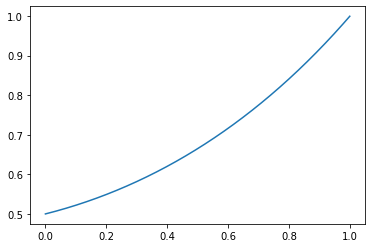

In [304]:
plt.plot( x_axis, psi_f( x_axis ) )

In [305]:
psi_f( 0 )

0.5

In [306]:
psi_f( 1 )

0.9994242691234354